In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Multiple Linear Regression

Multiple linear regression simply means that you have more than one feature variable.

For the housing price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Source: [Linear Regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

Generate a linear dataset with three features

In [2]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


In [3]:
X

array([[ 1.56464366, -2.6197451 , -0.03582604],
       [-1.4123037 ,  1.46564877, -0.90802408],
       [ 1.47789404, -0.51827022,  0.35711257],
       [-0.3011037 , -1.47852199, -0.11564828],
       [ 0.73846658,  0.17136828,  0.19686124],
       [ 0.0675282 , -1.42474819, -0.2257763 ],
       [-0.18565898, -1.10633497, -0.47917424],
       [-1.95967012, -1.32818605,  0.2088636 ],
       [-0.60063869, -0.29169375,  0.37569802],
       [-0.50175704,  0.91540212, -0.8084936 ],
       [ 0.76743473, -0.46947439,  1.57921282],
       [ 0.81252582,  1.35624003, -1.19620662],
       [ 0.93128012, -0.83921752,  1.03099952],
       [ 0.82254491, -1.22084365, -1.05771093],
       [ 0.11092259, -1.15099358, -0.54438272],
       [-0.1382643 ,  0.64768854,  0.49671415],
       [-0.676922  ,  0.61167629, -0.38508228],
       [-0.46063877,  1.05712223, -0.71984421],
       [-1.98756891, -0.21967189,  0.09176078],
       [ 0.08704707, -0.29900735,  0.8219025 ],
       [-0.23415337, -0.23413696,  1.523

With three or more dimensions, it becomes harder to visualize the linear trends in our data.

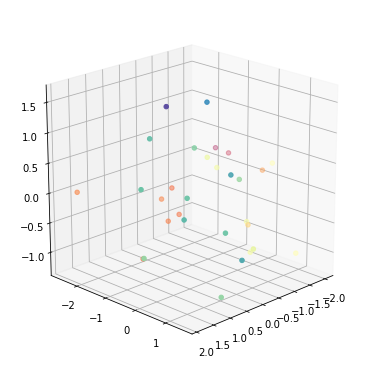

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

We can still visualize three features as a 3D plot, but what about n dimensions? This becomes very difficult for the human brain to visualize. 

We could pick just one feature from X to fit our model, but what we really want it to find is a line that best fits the data in n-dimensional space. To achieve this, linear regression can be solved by using the analytical approach called [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) or by using the computational approach called [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) for estimating the parameters. Note that there are [tradeoffs](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent) from using either approach. The linear regression model in Sklearn uses the Ordinary Least Squares method.

Luckily, we can just supply our n-dimensional features, and sklearn will fit the model by using all our features.

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999838079561164


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

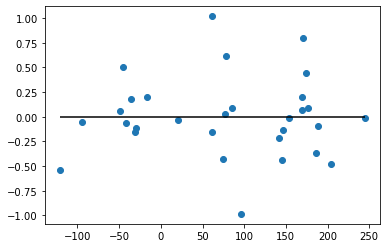

In [6]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.

## Your turn!